In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colleting data
- Collecting data from csv files

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
combine = pd.concat([train, test])

# Analyzing data
-  Data visualization
-  Creating charts and graphs
-  Interpreting statistical analysis results
-  Developing a research question or hypothesis


<br></br>
**Available and described features.**
<br></br>

![alt text](features.png "Title")

In [4]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# Preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<br></br>
<br></br>
<br></br>
**Which features have empty, null, or blank values?**
<br></br>
- In the training dataset, the Cabin, Age, and Embarked features contain null values in that order.
- In the case of the test dataset, the Cabin and Age features are incomplete.

In [7]:
# Train nan values
def print_nan_and_inf_values(dataframe):
    for col in dataframe.columns:
        nan_count = dataframe[col].isna().sum()
        if nan_count != 0:
            print(f"Column {col} has {nan_count} nan values.")
print_nan_and_inf_values(train)

Column Age has 177 nan values.
Column Cabin has 687 nan values.
Column Embarked has 2 nan values.


In [8]:
# Test nan values
print_nan_and_inf_values(test)

Column Age has 86 nan values.
Column Fare has 1 nan values.
Column Cabin has 327 nan values.



**Exploratory Data Analysis**
<br></br>
- Dataset Overview: The train dataset includes information for 891 passengers on the Titanic.

- Age Distribution: The passengers' ages range from 0.42 to 80.00 years

- Survival Rate: The dataset reflects a survival rate of approximately 38%.

- Fare Variability: Fares paid by passengers vary significantly, ranging from $0.00 to $512.33, with a mean fare of about $32.20. With a minority of passengers (less than 1%) paying fares as high as $512.

- Percentile Insights: Percentile statistics provide insights into different age and fare thresholds for the dataset.

- Age and Fare Distribution: The data shows that passengers were of varying ages, with a substantial number of passengers in their late 20s. Fare distribution is wide, with a significant portion of passengers paying relatively low fares.

- Pclass: Correlation exceeding 0.5 between Pclass=1 and Survived.

- Sex: Females (Sex=female) exhibited an exceptionally high survival rate of 74%.

In [9]:
train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [10]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Data Visualization**

- Infants (aged 4 or below) exhibited a notably high survival rate.
- Even the oldest passengers, aged 80, managed to survive.
- A significant number of individuals between the ages of 15 and 25 did not make it.
- The majority of passengers fall within the 15-35 age range.
- While Pclass=3 accommodated the most passengers, unfortunately, most of them did not survive. This aligns with our classification assumption #2.
- Infant passengers within Pclass=2 and Pclass=3 largely survived, providing further support for our classification assumption #2.
- Pclass=1 saw the highest survival rate among its passengers, reinforcing our classification assumption #3.
- Age distribution among passengers varies across different Pclass categories.

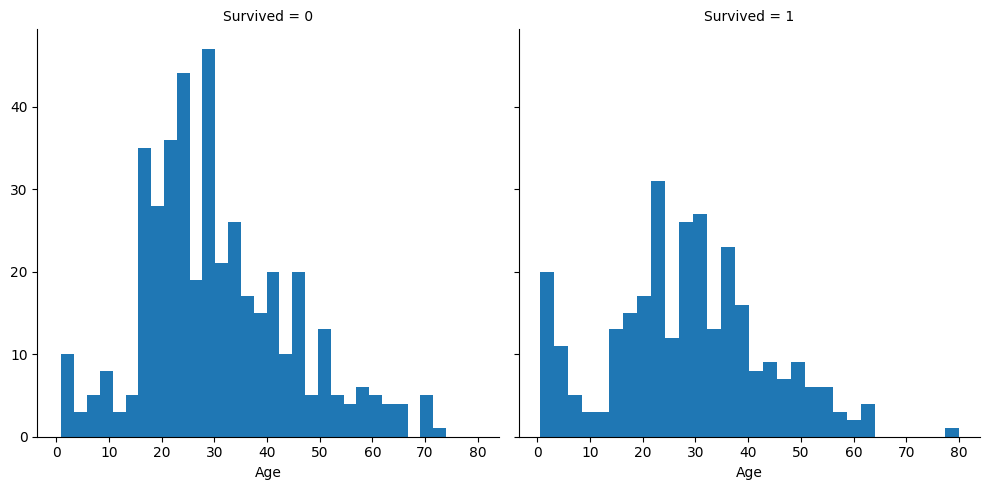

In [12]:
age_viz = sns.FacetGrid(train, col='Survived', height=5, aspect=1)
age_viz.map(plt.hist, 'Age', bins=30)

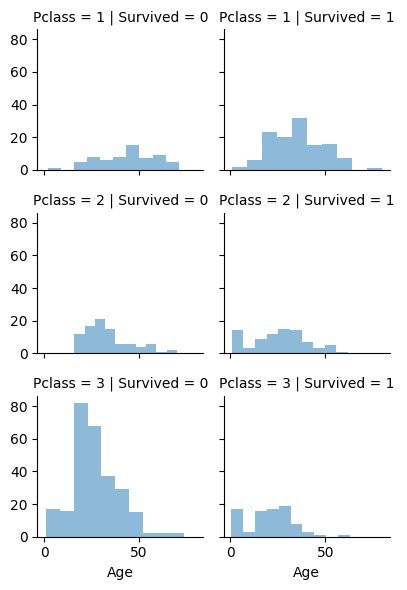

In [13]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2, aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

In [14]:
train['Title'], test['Title'] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [train, test]]
    
train.groupby(['Title', 'Sex'])['Age'].agg(['mean', 'count'])

mean  count
Title    Sex                     
Capt     male    70.000000      1
Col      male    58.000000      2
Countess female  33.000000      1
Don      male    40.000000      1
Dr       female  49.000000      1
         male    40.600000      5
Jonkheer male    38.000000      1
Lady     female  48.000000      1
Major    male    48.500000      2
Master   male     4.574167     36
Miss     female  21.773973    146
Mlle     female  24.000000      2
Mme      female  24.000000      1
Mr       male    32.368090    398
Mrs      female  35.898148    108
Ms       female  28.000000      1
Rev      male    43.166667      6
Sir      male    49.000000      1

In [15]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}
train['Title'], test['Title'] = [df.Title.map(TitleDict) for df in [train, test]]
train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [16]:
print ("Avg age of 'Miss' Title", round(train[train.Title=="Master"]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling without Parents", round(train[(train.Title=="Master") & (train.Parch==0)]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling with Parents", round(train[(train.Title=="Master") & (train.Parch!=0)]['Age'].mean()), '\n')

display(train[train.Title.isnull()])
display(test[test.Title.isnull()])

Avg age of 'Miss' Title 5
Avg age of 'Miss' Title travelling without Parents 12
Avg age of 'Miss' Title travelling with Parents 4 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [17]:
##There is Dona which is royalty which is not covered in test_data. Update the same
test.at[414,'Title'] = 'Royalty'

In [18]:
print(train.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))


                            mean  count  median
Pclass Sex    Title                            
1      female Miss     29.744681     47    30.0
              Mrs      40.400000     35    40.0
              Royalty  43.333333      3    48.0
       male   Master    5.306667      3     4.0
              Mr       41.580460     87    40.0
              Officer  56.600000      5    56.0
              Royalty  42.166667      6    42.0
2      female Miss     22.390625     32    24.0
              Mrs      33.547619     42    31.5
       male   Master    2.258889      9     1.0
              Mr       32.768293     82    31.0
              Royalty  42.000000      8    46.5
3      female Miss     16.123188     69    18.0
              Mrs      33.515152     33    31.0
       male   Master    5.350833     24     4.0
              Mr       28.724891    229    26.0


In [19]:
for df in [train, test, combine]:
    if 'Title' not in df.columns:
        df['Title'] = 'Other'  # Add a default value if the column doesn't exist
    df.loc[(df['Title'] == 'Miss') & (df['Parch'] != 0), 'Title'] = 'FemaleChild'

In [20]:
display(combine[(combine.Age.isnull()) & (combine.Title=='FemaleChild')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [21]:
grp = train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]

train['Age'], test['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [train, test]]


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class DropColumns(BaseEstimator, TransformerMixin):
    """
    Um transformador personalizado para remover colunas específicas de um DataFrame pandas.
    """
    def __init__(self, input):
        self.input = input
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xtransformed = X.drop(self.input, axis=1, inplace=False)
        return Xtransformed
cols = ['Name', 'Ticket', 'Cabin']

In [23]:
el = DropColumns(cols)
el.fit_transform(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.000000,1,0,7.2500,S,Mr
1,2,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,3,1,3,female,26.000000,0,0,7.9250,S,Miss
3,4,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,5,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,Royalty
887,888,1,1,female,19.000000,0,0,30.0000,S,Miss
888,889,0,3,female,6.903846,1,2,23.4500,S,FemaleChild
889,890,1,1,male,26.000000,0,0,30.0000,C,Mr


In [24]:
from sklearn.preprocessing import OrdinalEncoder
class Encoder(OrdinalEncoder):
    def __init__(self, columns_to_encode):
        self.columns = None
        self.columns_to_encode = columns_to_encode
        OrdinalEncoder.__init__(self)
    def fit(self, X, y=None):
        self.columns = X.columns
        OrdinalEncoder.fit(self, X[self.columns_to_encode], y)
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        encoded_data = OrdinalEncoder.transform(self, X[self.columns_to_encode])
        Xtransformed[self.columns_to_encode] = encoded_data
        return Xtransformed

In [25]:
en = Encoder(['Sex', 'Embarked', "Title"])
en.fit_transform(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.000000,1,0,A/5 21171,7.2500,NaN,2.0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.000000,1,0,PC 17599,71.2833,C85,0.0,4.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.000000,1,0,113803,53.1000,C123,2.0,4.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.000000,0,0,373450,8.0500,NaN,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.000000,0,0,211536,13.0000,NaN,2.0,6.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.000000,0,0,112053,30.0000,B42,2.0,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,6.903846,1,2,W./C. 6607,23.4500,NaN,2.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.000000,0,0,111369,30.0000,C148,0.0,3.0


In [26]:
class Operation:
    def __init__(self, function, separator):
        self.function  = function
        _ = '_'
        self.separator = _ + separator + _ 
    def result_col_name(self, lcol, rcol):
        return self.separator.join((lcol, rcol))

class AbstractSynthesis:
    def __init__(self, left_col, right_col, operation):
        self.col1 = left_col
        self.col2 = right_col
        self.rcol = operation.result_col_name(left_col, right_col)
        self.opfn = operation.function
    def extract_feature(self, X):
        new_feature = self.opfn(X[self.col1], X[self.col2])
        return new_feature
    def applyto(self, X):
        X[self.rcol] = self.extract_feature(X)
    def __repr__(self):
        return (
            f"AbstractSynthesis(Feature1: '{self.col1}', Feature2: '{self.col2}', "
            + f"ResultantFeature: '{self.rcol}')"
        )
    
class SynthesisReactor(BaseEstimator, TransformerMixin):
    def __init__(self, params):
        self.params = params
    def fit(self, X, y=None):
        self.params = tuple(
            AbstractSynthesis(ftr1, ftr2, op) for ftr1, ftr2, op in self.params
        )
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        for synth in self.params:
            synth.applyto(Xtransformed)
        return Xtransformed

In [27]:
from sklearn.impute import SimpleImputer

class CustomImputer(SimpleImputer):
    def __init__(self, missing_values=np.nan, strategy='mean'):
        self.columns = None
        SimpleImputer.__init__(self, 
                               missing_values=missing_values, 
                               strategy=strategy)
    def fit(self, X, y=None):
        self.columns = X.columns
        SimpleImputer.fit(self, X, y)
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        Xtransformed = SimpleImputer.transform(self, Xtransformed)
        return pd.DataFrame(columns=self.columns, data=Xtransformed)

In [28]:
from sklearn.preprocessing import StandardScaler

class CustomSTDScaler(StandardScaler):
    def __init__(self, keep_features):
        self.columns = None
        self.keep_features = keep_features
        StandardScaler.__init__(self)
    def fit(self, X, y=None):
        self.columns = [col for col in X.columns if col not in self.keep_features]
        StandardScaler.fit(self, X[self.columns])
        return self
    def transform(self, X):
        Xtransformed = X.copy()
        Xtransformed[self.columns] = StandardScaler.transform(self, X[self.columns])
        return Xtransformed

In [29]:
X, y = train.drop('Survived', axis=1), train['Survived']
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Royalty
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,6.903846,1,2,W./C. 6607,23.4500,NaN,S,FemaleChild
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


In [30]:
DIV  = Operation(function=(lambda c1, c2 : c1 / c2),
                 separator='to')
MUL  = Operation(function=(lambda c1, c2 : c1 * c2),
                 separator='by')
CDIV = Operation(function=(lambda c1, c2 : DIV.function(c1, c2+1)),
                 separator='to')
PLUS = Operation(function=(lambda c1, c2 : c1 + c2 + 1),
                 separator='plus')

eliminated        = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch', 'Fare']
columns_to_encode = ['Sex', 'Embarked', 'Title']
new_features      = [('Pclass', 'Fare', MUL), ('Parch', 'SibSp', CDIV), ('Parch', 'SibSp', PLUS)] 
keep_features     = ['Sex','Embarked', 'Title']

In [31]:
from sklearn.pipeline import Pipeline
preparing_pipeline = Pipeline([
    ('encoder', Encoder(columns_to_encode)),
    ('synthesis_reactor', SynthesisReactor(params=new_features)),
    ('imputer', CustomImputer(strategy='most_frequent')),
    ('eliminator', DropColumns(eliminated)),
    ('scaler', CustomSTDScaler(keep_features))
])

prepared = preparing_pipeline.fit_transform(X)
prepared

,Pclass,Sex,Age,Embarked,Title,Pclass_by_Fare,Parch_to_SibSp,Parch_plus_SibSp
0,0.827377,1.0,-0.554041,2.0,3.0,-0.577965,-0.409289,0.059160
1,-1.566107,0.0,0.628094,0.0,4.0,0.382936,-0.409289,0.059160
2,0.827377,0.0,-0.258507,2.0,2.0,-0.538682,-0.409289,-0.560975
3,-1.566107,0.0,0.406444,2.0,4.0,0.030196,-0.409289,0.059160
4,0.827377,1.0,0.406444,2.0,3.0,-0.531407,-0.409289,-0.560975
...,...,...,...,...,...,...,...,...
886,-0.369365,1.0,-0.184624,2.0,6.0,-0.495519,-0.409289,-0.560975
887,-1.566107,0.0,-0.775692,2.0,2.0,-0.417922,-0.409289,-0.560975
888,0.827377,0.0,-1.669398,2.0,0.0,0.364830,1.401667,1.299429
889,-1.566107,1.0,-0.258507,0.0,3.0,-0.417922,-0.409289,-0.560975


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(prepared, y, test_size=0.25,random_state=0)
print(x_train.shape, x_test.shape)

(668, 8) (223, 8)


<Axes: >

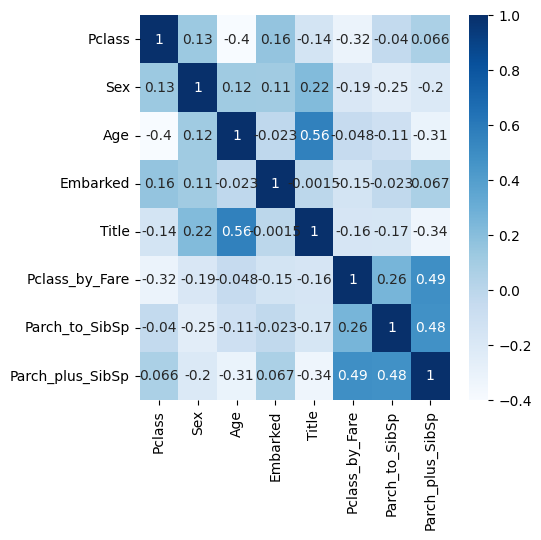

In [33]:
plt.figure(figsize= (5 , 5))
sns.heatmap(prepared.corr(),cmap="Blues", annot=True)

In [39]:
import scipy
from sklearn.svm import SVC, LinearSVC

# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
# # Set the parameters by cross-validation
# param_dist = {'C': scipy.stats.uniform(0.1, 1000), 'gamma': scipy.stats.uniform(.001, 1.0),
#   'kernel': ['rbf'], 'class_weight':['balanced', None]}

# clf = SVC()

# # run randomized search
# n_iter_search = 10000
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                    n_iter=n_iter_search, n_jobs=-1, cv=4)

# start = time.time()
# random_search.fit(prepared, y)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))
# report(random_search.cv_results_)

'''
RandomizedSearchCV took 1267.65 seconds for 10000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.837 (std: 0.016)
Parameters: {'C': 1.2354009263445653, 'class_weight': None, 'gamma': 0.07192270715734961, 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.837 (std: 0.016)
Parameters: {'C': 10.180260530857977, 'class_weight': None, 'gamma': 0.029595931523850427, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.837 (std: 0.015)
Parameters: {'C': 427.50414671533844, 'class_weight': None, 'gamma': 0.004281227575631651, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.837 (std: 0.015)
Parameters: {'C': 232.53160453711908, 'class_weight': None, 'gamma': 0.006609989938627269, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.837 (std: 0.015)
Parameters: {'C': 693.8189320256859, 'class_weight': None, 'gamma': 0.0033995392823954465, 'kernel': 'rbf'}

'''


"\nRandomizedSearchCV took 1267.65 seconds for 10000 candidates parameter settings.\nModel with rank: 1\nMean validation score: 0.837 (std: 0.016)\nParameters: {'C': 1.2354009263445653, 'class_weight': None, 'gamma': 0.07192270715734961, 'kernel': 'rbf'}\n\nModel with rank: 1\nMean validation score: 0.837 (std: 0.016)\nParameters: {'C': 10.180260530857977, 'class_weight': None, 'gamma': 0.029595931523850427, 'kernel': 'rbf'}\n\nModel with rank: 3\nMean validation score: 0.837 (std: 0.015)\nParameters: {'C': 427.50414671533844, 'class_weight': None, 'gamma': 0.004281227575631651, 'kernel': 'rbf'}\n\nModel with rank: 3\nMean validation score: 0.837 (std: 0.015)\nParameters: {'C': 232.53160453711908, 'class_weight': None, 'gamma': 0.006609989938627269, 'kernel': 'rbf'}\n\nModel with rank: 3\nMean validation score: 0.837 (std: 0.015)\nParameters: {'C': 693.8189320256859, 'class_weight': None, 'gamma': 0.0033995392823954465, 'kernel': 'rbf'}\n\n"

In [40]:
params = {'kernel': 'rbf', 
          'C': 1.2354009263445653,
          'gamma': 0.07192270715734961,
          'class_weight': None}
svc = SVC(**params)
scores = cross_val_score(svc, prepared, y, cv=4, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.03)


In [41]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             svc.predict(x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             svc.predict(x_test))*100)


[[121  18]
 [ 21  63]]
Training Accuracy :  84.28143712574851
Validation Accuracy :  82.51121076233184


In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             logreg.predict(x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             logreg.predict(x_test))*100)

[[116  23]
 [ 24  60]]
Training Accuracy :  80.38922155688623
Validation Accuracy :  78.9237668161435


In [43]:
coeff_df = pd.DataFrame(prepared.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
6,Parch_to_SibSp,0.174736
4,Title,0.120241
5,Pclass_by_Fare,0.062834
3,Embarked,-0.198557
7,Parch_plus_SibSp,-0.472505
2,Age,-0.641193
0,Pclass,-0.909497
1,Sex,-2.589144


In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=5)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             random_forest.predict(x_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             random_forest.predict(x_test))*100)

[[124  15]
 [ 23  61]]
Training Accuracy :  85.17964071856288
Validation Accuracy :  82.95964125560538


In [47]:
models = pd.DataFrame({
    'Model': [svc, logreg, random_forest],
    'Score': [metrics.accuracy_score(y_test, 
                             svc.predict(x_test))*100,
              metrics.accuracy_score(y_test, 
                             logreg.predict(x_test))*100,
              metrics.accuracy_score(y_test, 
                             random_forest.predict(x_test))*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,"(DecisionTreeClassifier(max_depth=5, max_featu...",82.959641
0,"SVC(C=1.2354009263445653, gamma=0.071922707157...",82.511211
1,LogisticRegression(max_iter=1000),78.923767


In [48]:
prepared_tst = preparing_pipeline.transform(test)
predictions = models['Model'][0].predict(prepared_tst)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission_svc.csv', index=False)